# Project: Investigate a Dataset - [tmdb_5000_movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

# Questions

# Importing libraries

In [624]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data Wrangling

In [625]:
# Read data from csv file and return the dataframe
df = pd.read_csv('tmdb_5000_movies.csv')

pd.set_option('display.max_colwidth', None)

In [626]:
# print data of five rows
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.44,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-12-10,2787965087,162.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.20,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic island""}, {""id"": 1319, ""name"": ""east india trading company""}, {""id"": 2038, ""name"": ""love of one's life""}, {""id"": 2052, ""name"": ""traitor""}, {""id"": 2580, ""name"": ""shipwreck""}, {""id"": 2660, ""name"": ""strong woman""}, {""id"": 3799, ""name"": ""ship""}, {""id"": 5740, ""name"": ""alliance""}, {""id"": 5941, ""name"": ""calypso""}, {""id"": 6155, ""name"": ""afterlife""}, {""id"": 6211, ""name"": ""fighter""}, {""id"": 12988, ""name"": ""pirate""}, {""id"": 157186, ""name"": ""swashbuckler""}, {""id"": 179430, ""name"": ""aftercreditsstinger""}]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.",139.08,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""name"": ""Second Mate Productions"", ""id"": 19936}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-05-19,961000000,169.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.90,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret agent""}, {""id"": 9663, ""name"": ""sequel""}, {""id"": 14555, ""name"": ""mi6""}, {""id"": 156095, ""name"": ""british secret service""}, {""id"": 158431, ""name"

In [627]:
# total number of duplicate exists in whole dataframe
df.duplicated().sum()

0

In [628]:
# info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [629]:
df.shape

(4803, 20)

In [630]:
# set format on float values to show upto 2 digits after the decimal point 
pd.set_option('display.float_format' , '{:,.2f}'.format)

In [631]:
# total number of duplicate exists in whole dataframe
df.duplicated().sum()

0

In [632]:
# zero count in popularity column
zero_count_popularity = (df['popularity'] == 0).sum()
zero_count_popularity

1

In [633]:
# zero count in revenue column
zero_count_revenue = (df['revenue'] == 0).sum()
zero_count_revenue

1427

In [634]:
# showing the percentage of zero values in revenue
percentage_revenue_zero_values =  ( zero_count_revenue * 100)  /4803
print(f"{percentage_revenue_zero_values:.0f}%  of revenue values are zero")

30%  of revenue values are zero


In [635]:
# zero count in budget column
zero_count_budget = (df['budget'] == 0).sum()
zero_count_budget

1037

In [636]:
# showing the percentage of zero values in budget
percentage_budget_zero_values =  ( zero_count_budget * 100)  /4803
print(f"{percentage_budget_zero_values:.0f}%  of budget values are zero")

22%  of budget values are zero


In [637]:
# checking for NaN, we will only work on columns which are important

df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [638]:
# info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [639]:
# Converting the release_date datatype to datatime
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

In [640]:
# removing movies that have released before year 1981 for better analysis
df = df[  df['release_date'].dt.year>1980]


In [641]:
# change value from complete date  to year because there is no need of day and month
df['release_date']= df['release_date'].dt.year

df.rename(columns={'release_date':'release_year'} , inplace = True)

In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4528 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4528 non-null   int64  
 1   genres                4528 non-null   object 
 2   homepage              1679 non-null   object 
 3   id                    4528 non-null   int64  
 4   keywords              4528 non-null   object 
 5   original_language     4528 non-null   object 
 6   original_title        4528 non-null   object 
 7   overview              4525 non-null   object 
 8   popularity            4528 non-null   float64
 9   production_companies  4528 non-null   object 
 10  production_countries  4528 non-null   object 
 11  release_year          4528 non-null   int32  
 12  revenue               4528 non-null   int64  
 13  runtime               4526 non-null   float64
 14  spoken_languages      4528 non-null   object 
 15  status                4528

# Function

In [643]:
## function for add labels and title to Graph

def assign_title_and_labels(title=None, xlabel=None, ylabel=None):
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    

## Exploratory Data Analysis

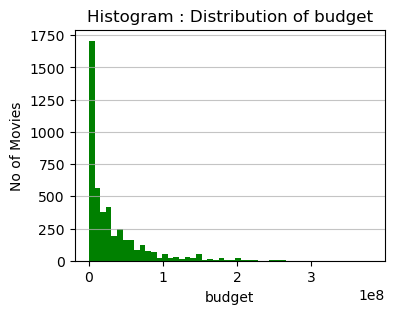

In [644]:
# analyse the data in histogram
plt.figure(figsize=(4,3))
plt.hist(df['budget'] , bins=50 , color='green')
plt.grid(axis='y', alpha=0.75)
assign_title_and_labels(title="Histogram : Distribution of budget" , xlabel="budget" , ylabel="No of Movies" )
plt.show()

In [645]:
## In the above chart we observed that the data is rightly skewed.
## Most of the movies have budget of 1e8

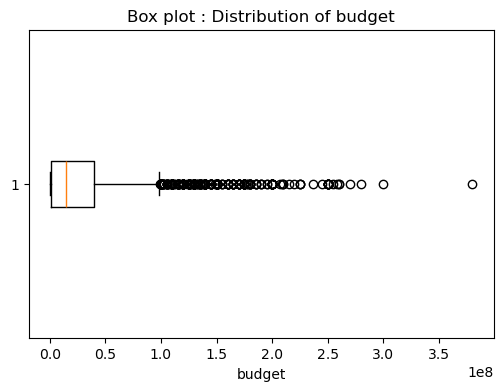

In [646]:
plt.figure(figsize=(6,4))
plt.boxplot(df['budget'] , vert=False )
assign_title_and_labels(title="Box plot : Distribution of budget" , xlabel="budget" )
plt.show()

In [647]:
## The above plot shows the budget distribution in box plot and the distribution is right skewed.

In [648]:
# Statistical information
df.describe()

,budget,id,popularity,release_year,revenue,runtime,vote_average,vote_count
count,"4,528.00","4,528.00","4,528.00","4,528.00","4,528.00","4,526.00","4,528.00","4,528.00"
mean,"30,448,400.05","59,662.65",21.68,"2,004.74","84,662,361.47",106.10,6.05,703.90
std,"41,454,032.51","90,491.33",32.26,7.84,"166,066,974.45",21.69,1.19,"1,251.55"
min,0.00,5.00,0.00,"1,981.00",0.00,0.00,0.00,0.00
25%,"851,882.50","9,312.75",4.81,"2,000.00",0.00,93.00,5.60,55.00
50%,"15,000,000.00","15,187.50",13.26,"2,006.00","19,814,978.50",103.00,6.20,242.00
75%,"40,000,000.00","63,762.50",28.54,"2,011.00","96,090,598.75",116.75,6.80,755.00
max,"380,000,000.00","459,488.00",875.58,"2,017.00","2,787,965,087.00",338.00,10.00,"13,752.00"


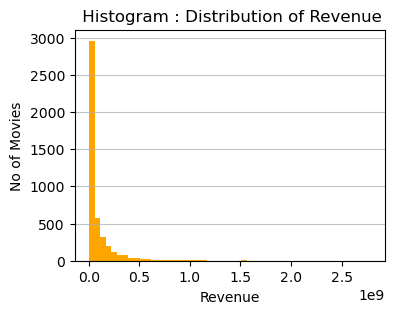

In [649]:
# analyse the data in histogram
plt.figure(figsize=(4,3))
plt.hist(df['revenue'] , bins=50 , color='orange')
assign_title_and_labels(title=" Histogram : Distribution of Revenue" , xlabel="Revenue" , ylabel="No of Movies" )
plt.grid(axis='y', alpha=0.75)
plt.show()

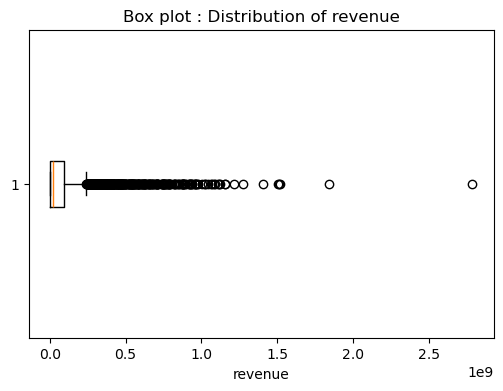

In [650]:
plt.figure(figsize=(6,4))
plt.boxplot(df['revenue'] , vert=False )
assign_title_and_labels(title="Box plot : Distribution of revenue" , xlabel="revenue" )
plt.show()

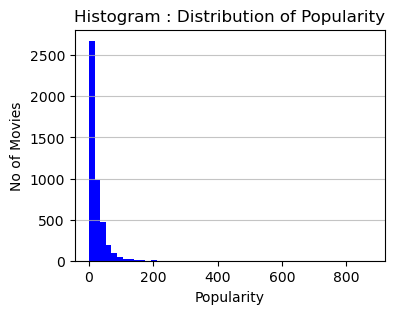

In [651]:
# analyse the data in histogram
plt.figure(figsize=(4,3))
plt.hist(df['popularity'] , bins=50 , color='blue')
assign_title_and_labels(title="Histogram : Distribution of Popularity" , xlabel="Popularity" , ylabel="No of Movies" )
plt.grid(axis='y', alpha=0.75)
plt.show()



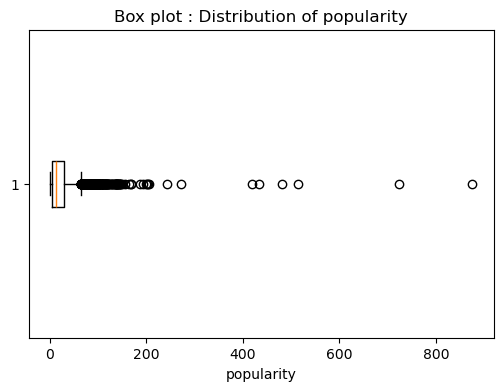

In [652]:
plt.figure(figsize=(6,4))
plt.boxplot(df['popularity'] , vert=False )
assign_title_and_labels(title="Box plot : Distribution of popularity" , xlabel="popularity" )
plt.show()

In [653]:
# Following are the observations that are need to addressed.
# 1) Data is skewed right
# 2) Mean is higher most the population
# 3) Outlier dominate because most of the popularity values are small and also same for the budget and revenue

In [654]:
# removing rows where three columns (revenue , budget , popularity) have zero value 
df = df[
    (df['revenue'] > 0) &
    (df['budget'] > 0) &
    (df['popularity'] > 0) ]

In [655]:
# popularity is most important column and 50% values lie in the following range 

df = df[ (df['popularity'] >= 4.81)  & ( df['popularity'] <= 28.54 ) ]


In [656]:
# There are no zero values in budget and revenue column 
# As you can see the minimum values are greater than zero in the statistics


In [657]:
df.describe()

,budget,id,popularity,release_year,revenue,runtime,vote_average,vote_count
count,"1,617.00","1,617.00","1,617.00","1,617.00","1,617.00","1,617.00","1,617.00","1,617.00"
mean,"31,093,291.30","36,630.81",15.69,"2,003.42","60,938,619.96",106.88,6.08,373.61
std,"27,723,502.01","66,271.94",6.51,7.84,"74,337,156.13",17.04,0.79,356.82
min,7.00,5.00,4.82,"1,981.00",5.00,63.00,2.30,10.00
25%,"11,000,000.00","8,051.00",10.14,"1,999.00","14,828,081.00",95.00,5.60,165.00
50%,"24,000,000.00","10,991.00",15.21,"2,005.00","38,376,497.00",104.00,6.10,299.00
75%,"44,000,000.00","29,963.00",20.75,"2,009.00","83,160,734.00",116.00,6.70,484.00
max,"195,000,000.00","417,859.00",28.53,"2,016.00","1,123,746,996.00",202.00,8.10,"4,443.00"


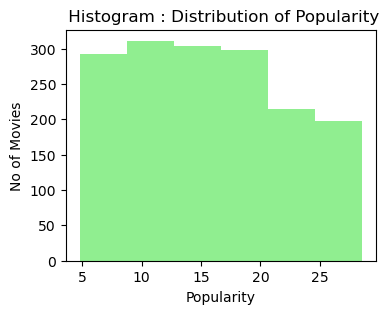

In [658]:
plt.figure(figsize=(4,3)  )
plt.hist(df['popularity'] , bins=6 , color='lightgreen')
assign_title_and_labels(title=" Histogram : Distribution of Popularity" , xlabel="Popularity" , ylabel="No of Movies" )
plt.show()

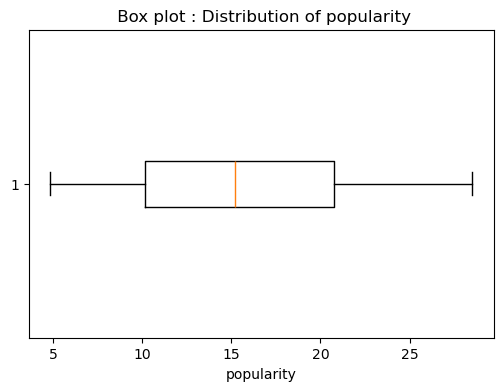

In [659]:
plt.figure(figsize=(6,4))
plt.boxplot(df['popularity'] , vert=False )
assign_title_and_labels(title=" Box plot : Distribution of popularity" , xlabel="popularity" )
plt.show()

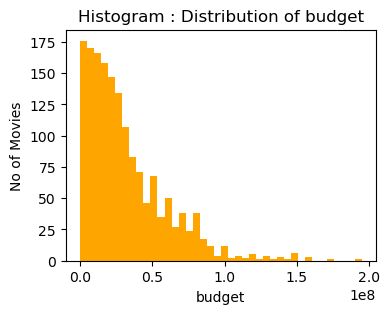

In [660]:
plt.figure(figsize=(4,3)  )
plt.hist(df['budget'] , bins=40 , color='orange')
assign_title_and_labels(title="Histogram : Distribution of budget" , xlabel="budget" , ylabel="No of Movies" )
plt.show()

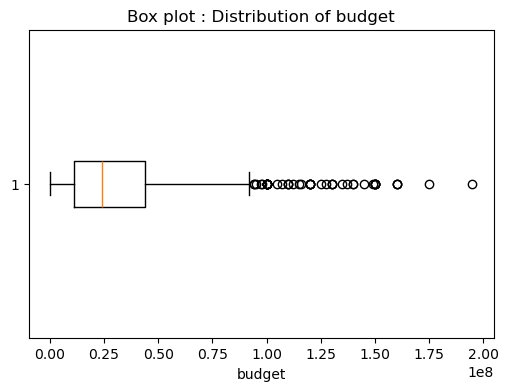

In [661]:
plt.figure(figsize=(6,4))
plt.boxplot(df['budget'] , vert=False )
assign_title_and_labels(title="Box plot : Distribution of budget" , xlabel="budget" )
plt.show()

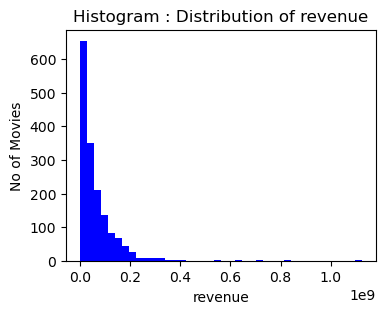

In [662]:
plt.figure(figsize=(4,3)  )
plt.hist(df['revenue'] , bins=40 , color='blue')
assign_title_and_labels(title="Histogram : Distribution of revenue" , xlabel="revenue" , ylabel="No of Movies" )
plt.show()

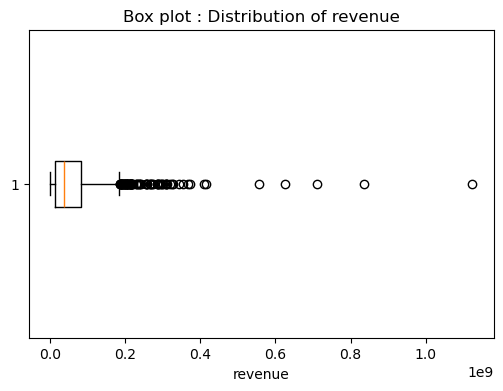

In [663]:
plt.figure(figsize=(6,4))
plt.boxplot(df['revenue'] , vert=False )
assign_title_and_labels(title="Box plot : Distribution of revenue" , xlabel="revenue" )
plt.show()

# Reseach Questions
# Q1 : What is the correlation between popularity and budget of the movie?

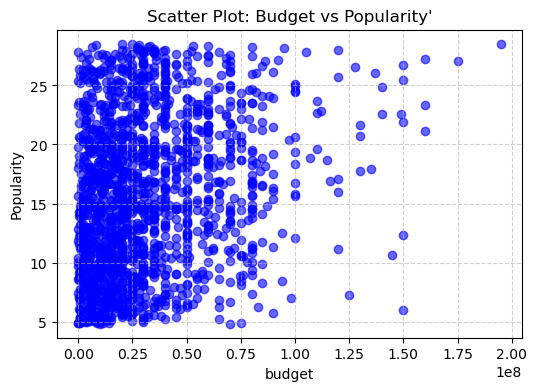

In [664]:
plt.figure(figsize=(6, 4))
plt.scatter(data=df, x='budget', y='popularity', color='blue', alpha=0.6)
assign_title_and_labels(title="Scatter Plot: Budget vs Popularity'" , xlabel="budget" , ylabel="Popularity" )
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

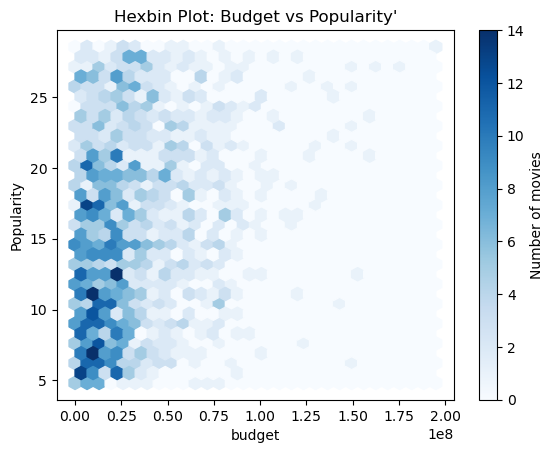

In [665]:
plt.hexbin(df['budget'], df['popularity'], gridsize=30, cmap='Blues')
plt.colorbar(label='Number of movies')
assign_title_and_labels(title="Hexbin Plot: Budget vs Popularity'" , xlabel="budget" , ylabel="Popularity" )
plt.show()

In [666]:
correlation = df['budget'].corr(df['popularity'])
print(f"Correlation between budget and popularity: {correlation:.2f}")

Correlation between budget and popularity: 0.23


# Q2 : What is the correlation between popularity and revenue of the movie?

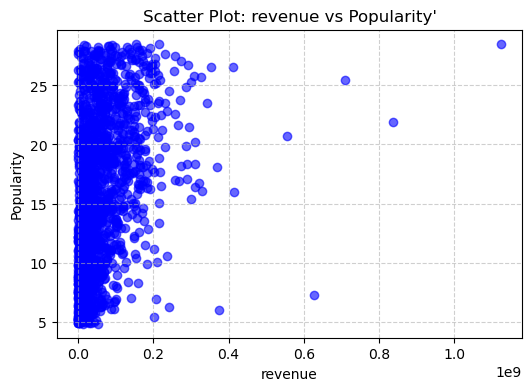

In [667]:
plt.figure(figsize=(6, 4))
plt.scatter(data=df, x='revenue', y='popularity', color='blue', alpha=0.6)
assign_title_and_labels(title="Scatter Plot: revenue vs Popularity'" , xlabel="revenue" , ylabel="Popularity" )
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

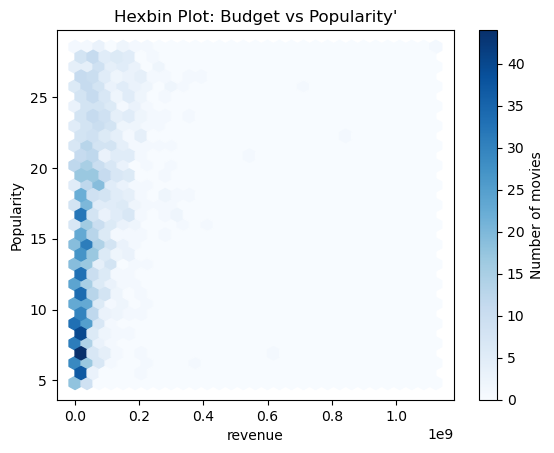

In [668]:
plt.hexbin(df['revenue'], df['popularity'], gridsize=30, cmap='Blues')
plt.colorbar(label='Number of movies')
assign_title_and_labels(title="Hexbin Plot: Budget vs Popularity'" , xlabel="revenue" , ylabel="Popularity" )
plt.show()

In [669]:
correlation = df['revenue'].corr(df['popularity'])
print(f"Correlation between revenue and popularity: {correlation:.2f}")

Correlation between revenue and popularity: 0.36


# Q3 : What is the correlation between popularity and runtime of the movie?

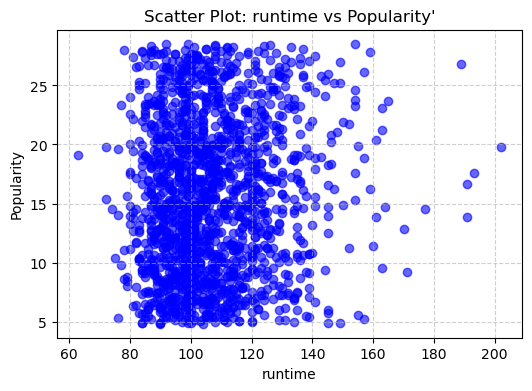

In [670]:
plt.figure(figsize=(6, 4))
plt.scatter(data=df, x='runtime', y='popularity', color='blue', alpha=0.6)
assign_title_and_labels(title="Scatter Plot: runtime vs Popularity'" , xlabel="runtime" , ylabel="Popularity" )
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [671]:
correlation = df['runtime'].corr(df['popularity'])
print(f"Correlation between runtime and popularity: {correlation:.2f}")

Correlation between runtime and popularity: 0.08


In [672]:
1)Majority of the movies have low revenue with varying popularity
2)Some high revenu movies have higher popularity but these are  outliers
3)There is no meaningful relation
4)Relation between budget and popularity is very weak.

SyntaxError: unmatched ')' (1347312189.py, line 1)

# Q4 : Which genres are most popular from year to year?

In [ ]:

df_sorted = df.sort_values(by=['release_year', 'popularity'],   ascending=[False, False])

df_highest_popularity_per_year = df_sorted.drop_duplicates(subset=['release_year'], keep='first')
df_highest_popularity_per_year[['release_year', 'popularity', 'genres','title']].head(10)

# Q5:  What kinds of properties are associated with movies that have high revenues? 

In [ ]:

df[['revenue','budget','runtime','popularity','release_year', 'title', 'genres']].sort_values(by='revenue' , ascending=False).head(10)

# Conclusion

# Limitation

In [ ]:
Missing and Incorrect values in the dataset